In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf

from src.dataset import *
from src.model import *

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Write TFRecord shards

In [2]:
# TFRWriter(image_size=256).write()

# Initialize model

In [3]:
config = {
    'local_depth': 16,
    'local_convdepth': 16,
    'local_imagesize': 256,
    'global_depth': 5,
    'global_convdepth': 32,
    'global_imagesize': 128,
    'scale': 0.25}

model = CIEXYZNet(**config)

2022-06-06 11:57:22.747498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:938] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0d:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-06 11:57:22.773607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:938] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0d:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-06 11:57:22.773843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:938] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0d:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-06 11:57:22.774633: I tensorflow/core/platform/cpu_feature_guard.cc:152] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with t

# Build model

In [4]:
dataloader = DataLoader('testing', image_size=256)
data = dataloader.data

In [5]:
for i, batch in enumerate(data):
    logits = model(batch['sRGB_image'])

2022-06-06 11:57:25.017911: I tensorflow/stream_executor/cuda/cuda_dnn.cc:379] Loaded cuDNN version 8400
2022-06-06 11:57:26.028528: I tensorflow/stream_executor/cuda/cuda_blas.cc:1804] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Filename: a1209-DSC_0014-2.JPG


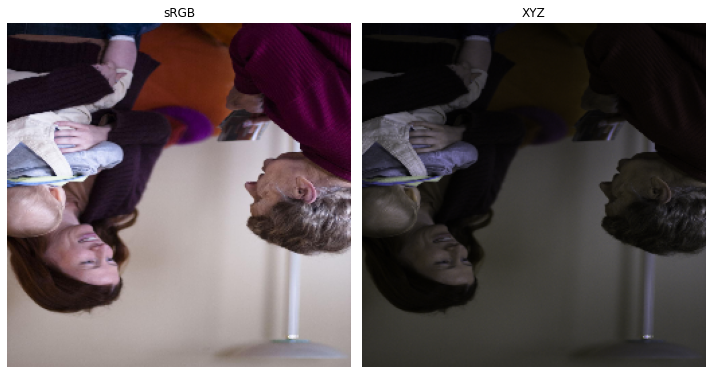

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))

idx = 0
print("Filename:", batch['filename'][idx].numpy().decode())
ax[0].imshow(batch['sRGB_image'][idx])
ax[1].imshow(batch['XYZ_image'][idx])
ax[0].set_title("sRGB")
ax[1].set_title("XYZ")
ax[0].axis("off")
ax[1].axis("off")
plt.tight_layout()
plt.show()

In [7]:
model.summary()

Model: "ciexyz_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sRGB2XYZ_localnet (Sequenti  (None, 256, 256, 3)      520515    
 al)                                                             
                                                                 
 sRGB2XYZ_globalnet (Sequent  (None, 18)               2653266   
 ial)                                                            
                                                                 
 XYZ2sRGB_localnet (Sequenti  (None, 256, 256, 3)      33363     
 al)                                                             
                                                                 
 XYZ2sRGB_globalnet (Sequent  (None, 18)               309778    
 ial)                                                            
                                                                 
Total params: 3,516,922
Trainable params: 3,516,922
Non-

In [8]:
model.srgb2xyz_localnet.summary()

Model: "sRGB2XYZ_localnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_0 (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv_1 (Conv2D)             (None, 256, 256, 64)      36928     
                                                                 
 conv_2 (Conv2D)             (None, 256, 256, 64)      36928     
                                                                 
 conv_3 (Conv2D)             (None, 256, 256, 64)      36928     
                                                                 
 conv_4 (Conv2D)             (None, 256, 256, 64)      36928     
                                                                 
 conv_5 (Conv2D)             (None, 256, 256, 64)      36928     
                                                                 
 conv_6 (Conv2D)             (None, 256, 256, 64)

In [9]:
model.srgb2xyz_globalnet.summary()

Model: "sRGB2XYZ_globalnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 256, 256, 3)       0         
                                                                 
 conv_0 (Conv2D)             (None, 256, 256, 64)      4864      
                                                                 
 maxpool_0 (MaxPooling2D)    (None, 128, 128, 64)      0         
                                                                 
 conv_1 (Conv2D)             (None, 128, 128, 64)      102464    
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 64, 64, 64)        0         
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 64)        102464    
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 32, 32, 64) 

In [10]:
model.xyz2srgb_localnet.summary()

Model: "XYZ2sRGB_localnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_0 (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv_1 (Conv2D)             (None, 256, 256, 16)      2320      
                                                                 
 conv_2 (Conv2D)             (None, 256, 256, 16)      2320      
                                                                 
 conv_3 (Conv2D)             (None, 256, 256, 16)      2320      
                                                                 
 conv_4 (Conv2D)             (None, 256, 256, 16)      2320      
                                                                 
 conv_5 (Conv2D)             (None, 256, 256, 16)      2320      
                                                                 
 conv_6 (Conv2D)             (None, 256, 256, 16)

In [11]:
model.xyz2srgb_globalnet.summary()

Model: "XYZ2sRGB_globalnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 128, 128, 3)       0         
                                                                 
 conv_0 (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 maxpool_0 (MaxPooling2D)    (None, 64, 64, 32)        0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        9248      
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 32, 32, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 16, 16, 32) 